https://python.plainenglish.io/building-a-perceptron-from-scratch-a-step-by-step-guide-with-python-6b8722807b2e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
X = [1, 0]

In [5]:
w = []
nInputs = 2
for i in range(nInputs):
    w.append(random.uniform(-1, 1))
w

[-0.934444240342807, 0.5640856263067835]

In [6]:
b = random.uniform(-1,1)
b

0.7792137492282403

In [7]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

def activation(z):
    return 1 if z >0.5 else 0

In [8]:
#weighted sum = w1*x1 + w2*x2 ... + b
z = sigmoid(np.dot(X, w) + b)
z

0.46127011724134526

In [9]:
y_pred = activation(z)
error = y - y_pred

NameError: name 'y' is not defined

In [10]:
lr = 0.1
w_new = []
for wi, xi in zip(w, X):
    w_new.append(wi + lr*error*xi)
    
b_new = b + lr*error

NameError: name 'error' is not defined

In [ ]:
class Perceptron():
    
    def __init__(self,input_size = 2, lr = 0.01, epochs = 20):
        #setting default parameters
        self.lr = lr
        self.epochs = epochs
        self.input_size = input_size
        self.w = np.random.uniform(-1, 1, size=(input_size))
        self.bias = random.uniform(-1,1)
        self.misses = []
        
    def predict(self, X):
        w = self.w
        b = self.bias
        z = sigmoid(np.dot(X, self.w) + b)
        
        if z > 0.5:
            return 1
        else:
            return 0
        
    def fit(self, X, y):
        
        for epoch in range(self.epochs):
            miss = 0
            for yi, xi in zip(y, X):
                y_pred = self.predict(xi)
                #update the weights to minimize error
                error = yi - y_pred
                self.w += self.lr*error*xi
                self.bias += self.lr*error
                miss += int(error != 0.0)
            #get the number of missclassifications of each epoch
            self.misses.append(miss)

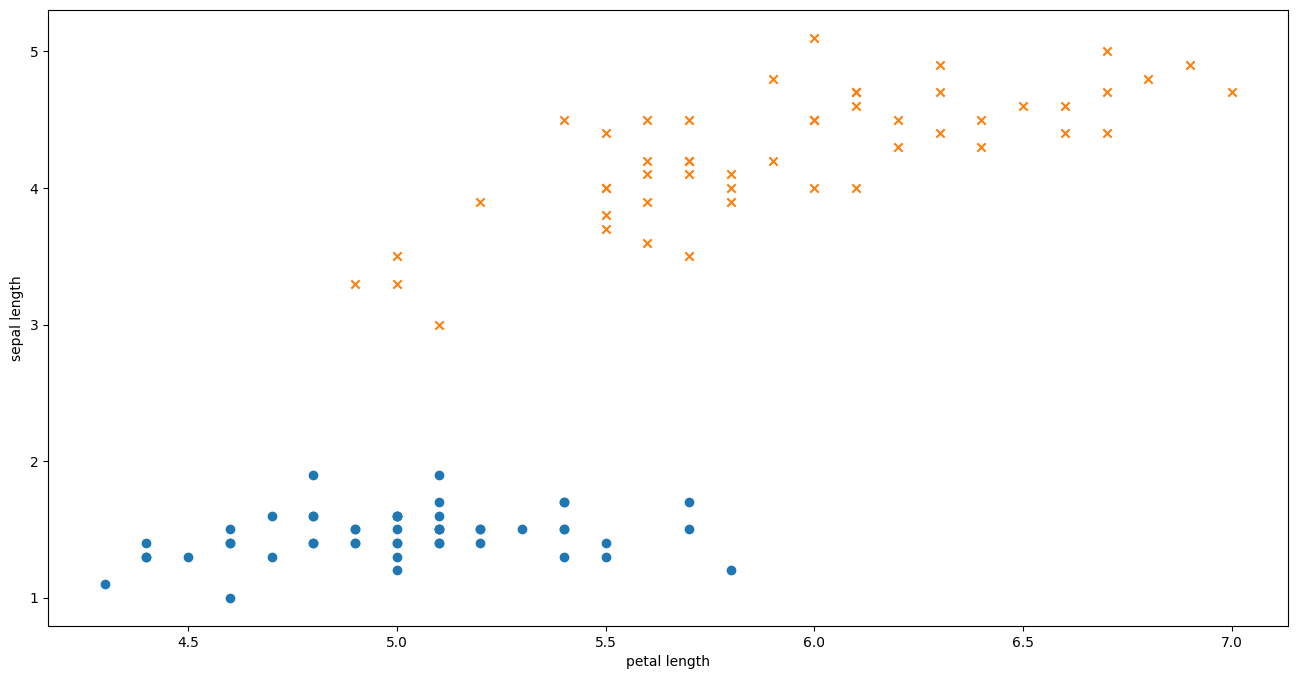

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[:100, [0,2]]
y = y[y<2]

# plot the data
plt.figure(figsize=(16,8))
plt.scatter(X[:50,0], X[:50,1], marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:,1], marker='x', label='virginica')
plt.ylabel('sepal length')
plt.xlabel('petal length')
plt.show()

In [13]:
perceptron = Perceptron()
perceptron.fit(X,y)
print(perceptron.w, perceptron.bias)

[0.00043428 0.057693  ] -0.14088189278530464
